In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

2021-10-12 05:46:47.698986: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-12 05:46:47.699012: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Load Database
We are using here cifar10 dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 101s 1us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

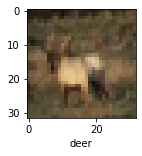

In [12]:
plot_sample(X_train,y_train,3)

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

2021-10-12 05:55:00.788707: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-10-12 05:55:00.788746: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (maruf-Katana-GF66-11UD): /proc/driver/nvidia/version does not exist
2021-10-12 05:55:00.790041: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-12 05:55:00.810576: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 36864000 exceeds 10% of free system memory.
2021-10-12 05:55:00.822987: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 36864000 exceeds 10% of free system mem

Epoch 1/5
  10/1563 [..............................] - ETA: 30s - loss: 2.4038 - accuracy: 0.1125

2021-10-12 05:55:02.697050: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 36864000 exceeds 10% of free system memory.


1563/1563 [==============================] - 29s 18ms/step - loss: 1.8117 - accuracy: 0.3554
Epoch 2/5
1563/1563 [==============================] - 29s 18ms/step - loss: 1.6226 - accuracy: 0.4282
Epoch 3/5
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5420 - accuracy: 0.4559
Epoch 4/5
1563/1563 [==============================] - 30s 19ms/step - loss: 1.4817 - accuracy: 0.4777
Epoch 5/5
1563/1563 [==============================] - 31s 20ms/step - loss: 1.4311 - accuracy: 0.4936


In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.54      0.55      1000
           1       0.63      0.61      0.62      1000
           2       0.42      0.26      0.32      1000
           3       0.32      0.33      0.32      1000
           4       0.56      0.27      0.36      1000
           5       0.31      0.51      0.39      1000
           6       0.52      0.56      0.54      1000
           7       0.41      0.70      0.52      1000
           8       0.76      0.43      0.55      1000
           9       0.59      0.57      0.58      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.48     10000
weighted avg       0.51      0.48      0.48     10000



In [17]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4570 - accuracy: 0.4754
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1163 - accuracy: 0.6088
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9852 - accuracy: 0.6574
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9004 - accuracy: 0.6894
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8328 - accuracy: 0.7097
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7802 - accuracy: 0.7306
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7342 - accuracy: 0.7444
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6881 - accuracy: 0.7600
Epoch 9/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6559 - accuracy: 0.7709
Epoch 10/10
1563/1563 [==============================] - 13s 8ms/step - l

In [20]:

cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9035 - accuracy: 0.7071


[0.9035242199897766, 0.707099974155426]

In [21]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[8.2907593e-04, 2.1510459e-03, 2.2622203e-03, 8.7019593e-01,
        1.7295623e-03, 5.8288127e-02, 7.9449965e-03, 1.5361569e-03,
        5.4575980e-02, 4.8687524e-04],
       [9.0191030e-04, 5.7880711e-03, 2.9171035e-06, 2.7913040e-07,
        3.4569809e-06, 6.1716063e-09, 6.8861652e-11, 5.0831385e-08,
        9.9326915e-01, 3.4090819e-05],
       [9.3440181e-03, 2.5197489e-02, 1.6129047e-04, 6.7779375e-04,
        2.8260725e-04, 1.7479922e-04, 1.7458206e-05, 2.2054091e-03,
        9.5959634e-01, 2.3427701e-03],
       [9.9144274e-01, 1.1213809e-03, 2.6120562e-03, 6.7919327e-06,
        4.4028242e-05, 3.2782381e-07, 2.0278985e-06, 1.0682932e-06,
        4.7674784e-03, 2.0130215e-06],
       [2.0713966e-05, 4.0137649e-05, 2.3972797e-03, 5.8238981e-03,
        1.3478681e-01, 5.2590203e-03, 8.5101736e-01, 6.1180984e-04,
        4.2687534e-05, 4.3184457e-07]], dtype=float32)

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [34]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

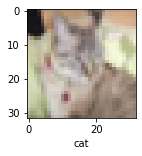

In [25]:
plot_sample(X_test, y_test,8)

In [26]:
classes[y_classes[8]]

'cat'

In [27]:
classes[y_classes[3]]

'airplane'

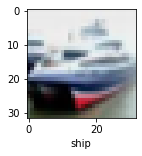

In [35]:
plot_sample(X_test, y_test,1)

In [36]:
classes[y_classes[1]]

'ship'